In [1]:
import azureml.core
from azureml.core import Workspace, Dataset

#Load workspace from the saved config file
try:
     ws = Workspace.from_config()
     print("Ready to use Azure ML SDK {} to work with {}".format(azureml.core.VERSION, ws.name))
except:
     print("Could not load AML workspace")

Ready to use Azure ML SDK 1.26.0 to work with mlw_sdk


In [2]:
#View Azure ML compute resources in ws
print("Compute Resources:")
for compute_name in ws.compute_targets:
    compute = ws.compute_targets[compute_name]
    print("\t", compute.name, ':', compute.type)

Compute Resources:
	 ci63b73c75 : ComputeInstance


In [3]:
#View datasets ws
print("Datasets:")
for dataset_name in list(ws.datasets.keys()):
    dataset = Dataset.get_by_name(ws, dataset_name)
    print("\t", dataset.name, 'version', dataset.version, 'ID', dataset.id)

Datasets:
	 test_data.csv version 1 ID 74fd6c48-508d-46b2-9428-09a7057c7ede
	 train_data.csv version 1 ID 2035914e-063b-434f-89b0-b0e391b22270


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [6]:
dataset = Dataset.get_by_id(ws, id='2035914e-063b-434f-89b0-b0e391b22270')
data = dataset.to_pandas_dataframe()

target = data.pop('RUL')
data = data.join(target)

In [7]:
print(data.shape)
data.describe()

(160359, 33)


,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,...,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000
mean,353.441665,123.331338,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,...,2349.645243,8088.950972,9.054747,0.025185,360.698801,2273.754039,98.389146,25.942709,15.565700,122.331338
std,205.969348,83.538146,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,...,111.167242,80.623257,0.751581,0.004997,31.021430,142.513114,4.656270,11.691422,7.015067,83.538146
min,0.000000,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,...,2027.570000,7845.780000,8.156300,0.020000,302.000000,1915.000000,84.930000,10.160000,6.010500,0.000000
25%,172.000000,57.000000,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,...,2387.970000,8070.530000,8.439250,0.020000,332.000000,2212.000000,100.000000,14.330000,8.601300,56.000000
50%,355.000000,114.000000,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,...,2388.070000,8118.590000,9.030100,0.030000,367.000000,2319.000000,100.000000,24.920000,14.953500,113.000000
75%,530.000000,173.000000,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,...,2388.160000,8139.410000,9.344200,0.030000,392.000000,2388.000000,100.000000,38.820000,23.294600,172.000000
max,708.000000,543.000000,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,...,2390.490000,8293.720000,11.066900,0.030000,400.000000,2388.000000,100.000000,39.890000,23.950500,542.000000


In [8]:
#Print column type and count
print(data.dtypes.value_counts())

if False:
    for col in data:
        print(col, data[col].dtype)

float64    22
object      6
int64       5
dtype: int64


962154

Number of instances:  (160359, 33)


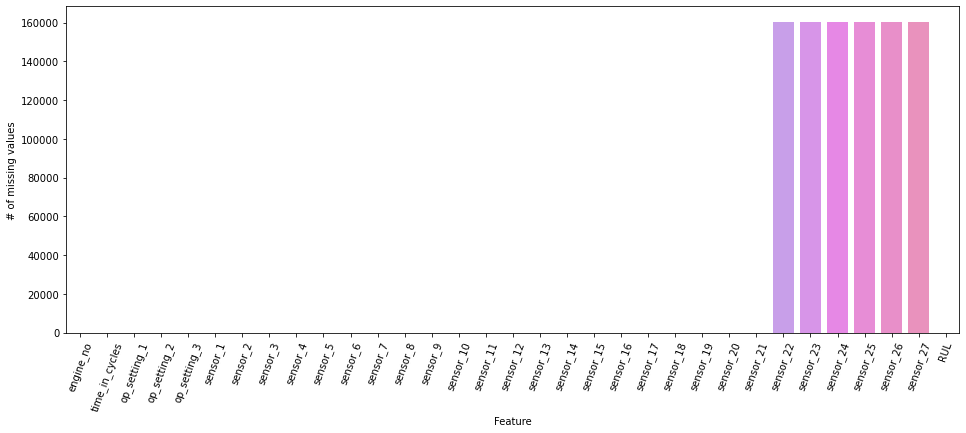

In [9]:
#Count # of NaN values per column
temp = data.isna().sum().reset_index()
temp.columns = ['Feature','# of missing values']

plt.figure(figsize=(16, 6))
nan_col = sns.barplot(x='Feature', y='# of missing values', data=temp)
nan_col.set_xticklabels(nan_col.get_xticklabels(),rotation=70)

print(data.isna().sum().sum())
print("\nNumber of instances: ", data.shape)

32071
(160359, 27)
0


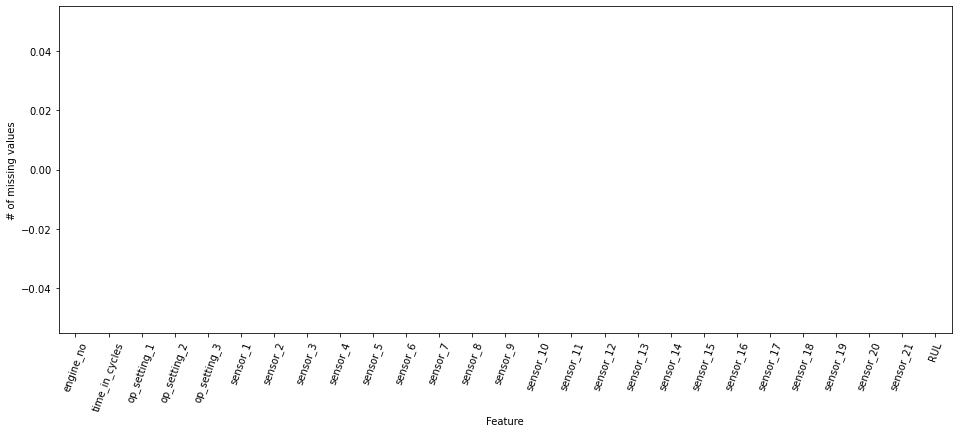

In [10]:
#Removes columns with more than 80% of missing values
threshold = 0.8
thresh = int(len(data)*(1-threshold))
print(thresh)
data_rm_90 = data.dropna(thresh= thresh, axis = 1)
print(data_rm_90.shape)

temp = data_rm_90.isna().sum().reset_index()
temp.columns = ['Feature','# of missing values']

plt.figure(figsize=(16, 6))
nan_col2 = sns.barplot(x='Feature', y='# of missing values', data=temp)
nan_col2.set_xticklabels(nan_col2.get_xticklabels(),rotation=70)

print(data_rm_90.isna().sum().sum())

if True:
    data = data_rm_90

Text(0, 0.5, 'Percentage of Missing Values')

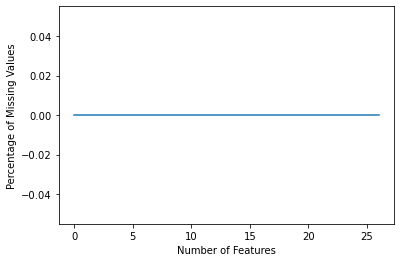

In [11]:
#-- Find percentage of missing values for each feature

desc = data.describe().T
desc['missing %'] = 1 - (desc['count'] /len(data))
desc = desc.sort_values(by='missing %', ascending = False)
plt.plot(np.arange(len(desc['missing %'])), desc['missing %'])
plt.xlabel('Number of Features')
plt.ylabel('Percentage of Missing Values')

Target Variable variance: 6978.621758989882


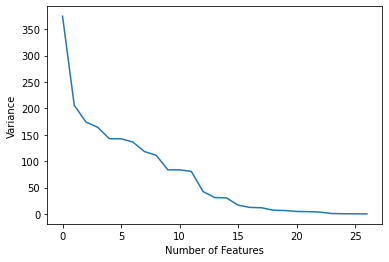

In [12]:
#-- Amount of variation 

#Drop variables with zero variation
var_data = data.var()
if True: # If True use the standard deviation. Use when not scaled
  var_data = np.sqrt(var_data) 

plt.plot(np.arange(len(var_data)), var_data.sort_values(ascending = False))
plt.xlabel('Number of Features')
plt.ylabel('Variance')

print('Target Variable variance: {}'.format(target.var()))

RUL               1.000000
time_in_cycles    0.675307
sensor_13         0.408596
sensor_11         0.194314
sensor_4          0.187177
sensor_17         0.158619
sensor_3          0.155608
sensor_2          0.141042
sensor_14         0.135931
sensor_8          0.130911
sensor_9          0.111163
sensor_15         0.106282
sensor_21         0.078354
sensor_20         0.078349
sensor_7          0.053817
sensor_12         0.053165
sensor_6          0.049166
sensor_16         0.045267
sensor_10         0.029333
engine_no         0.004292
sensor_19         0.002744
op_setting_3      0.002744
op_setting_1      0.002430
sensor_18         0.002376
sensor_5          0.002114
op_setting_2      0.001785
sensor_1          0.001735
Name: RUL, dtype: float64


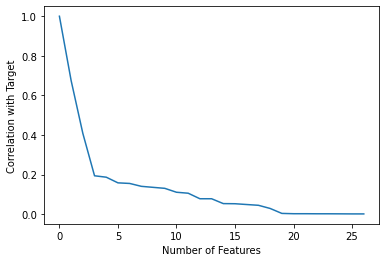

In [13]:
#Find all feature correlations with target variable
target_corr = pd.concat([data, target], axis = 1, sort = False)
target_corr_matrix = target_corr.corr(method = 'spearman')
# If True, find the absolute correlation, If False find negative correlations as well
if True:
  target_corr_matrix = abs(target_corr_matrix.iloc[-1])
else:
  target_corr_matrix = target_corr_matrix.iloc[-1]
target_corr_matrix = target_corr_matrix.sort_values(ascending = False).iloc[1:]

plt.plot(np.arange(len(target_corr_matrix)), target_corr_matrix)
plt.xlabel('Number of Features')
plt.ylabel('Correlation with Target')
print(target_corr_matrix)

c:\users\flaarkol\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


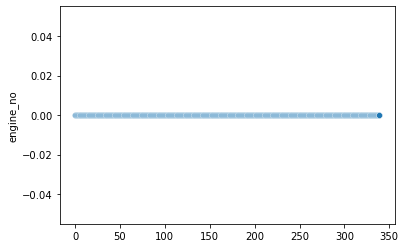

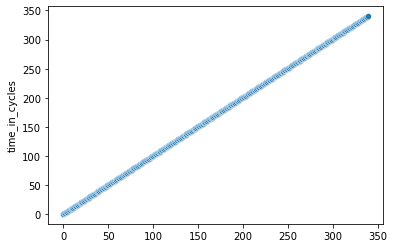

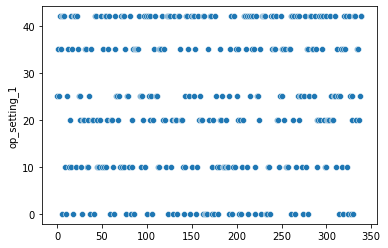

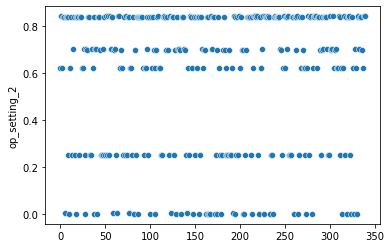

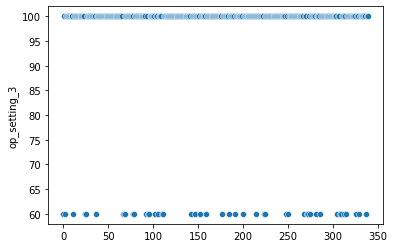

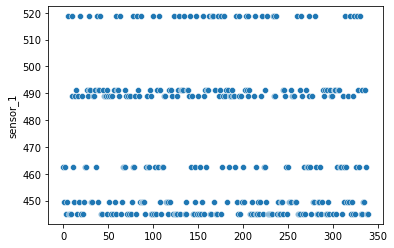

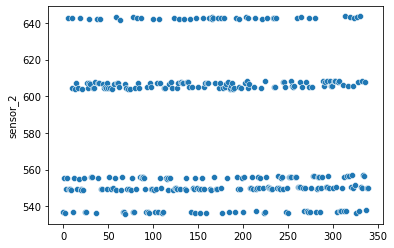

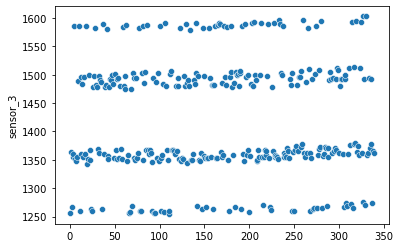

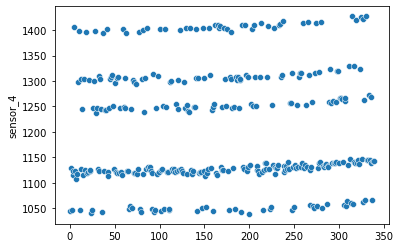

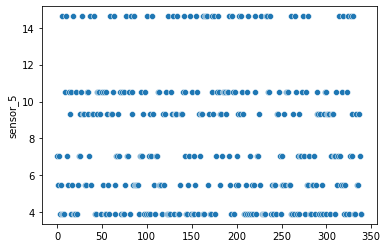

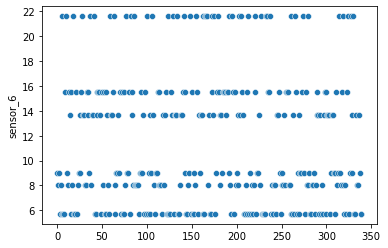

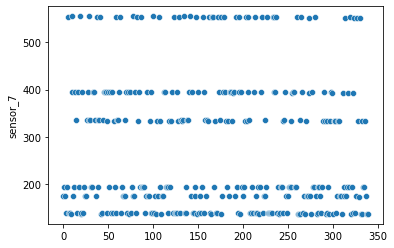

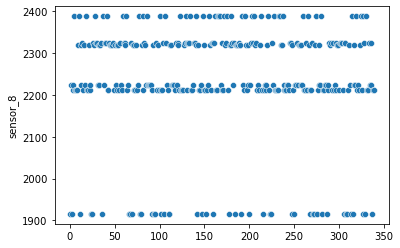

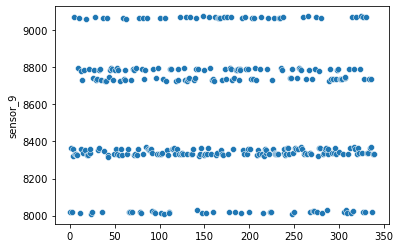

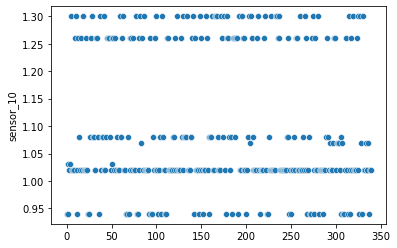

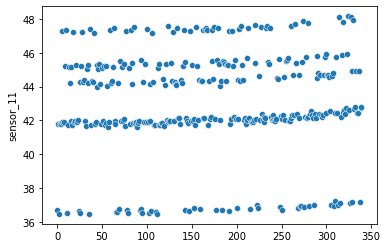

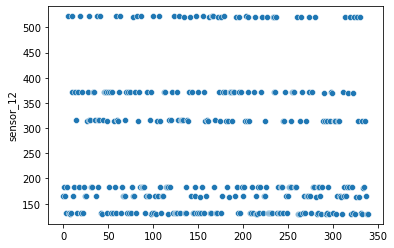

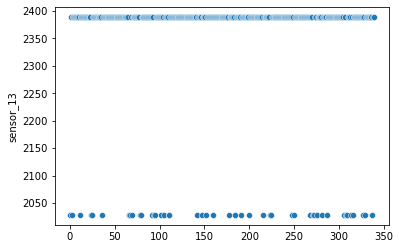

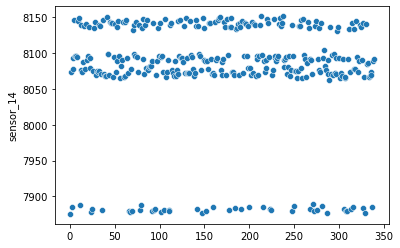

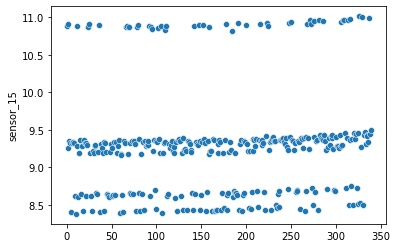

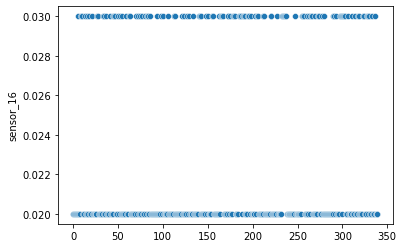

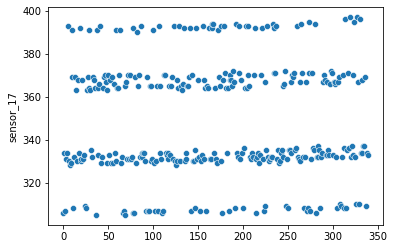

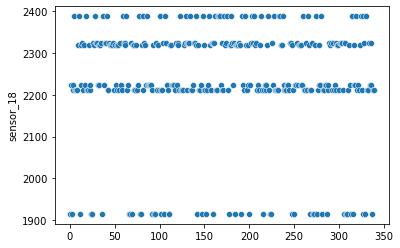

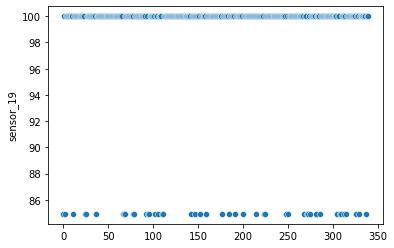

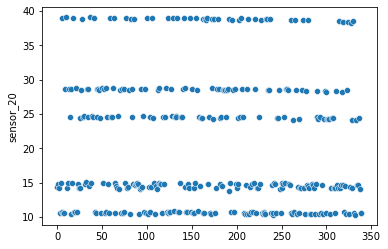

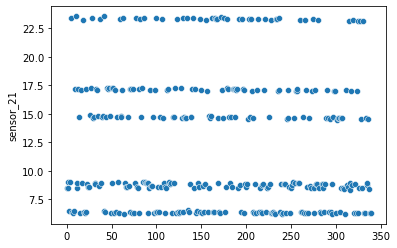

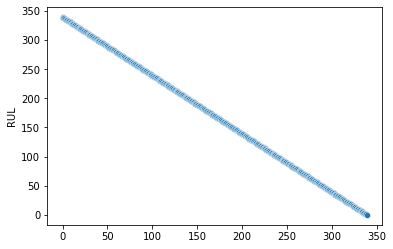

In [14]:
#Select the first engine and visualize features per over time
engine_1 = data[data['engine_no']==0]
for col in engine_1.columns:
    plt.figure()
    sns.scatterplot(data=engine_1, x=np.arange(len(engine_1[col])), y=engine_1[col])